In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0     ✔ purrr   0.2.5
✔ tibble  2.0.0     ✔ dplyr   0.7.8
✔ tidyr   0.8.2     ✔ stringr 1.3.1
✔ readr   1.3.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


# Input data

In [2]:
data <- read.csv("Data/data.csv")

## Generating dataset

In [ ]:
generate_linear_dataset <- function(n = 500, slope = 1, delta = 0.1){
    set.seed(42)

    df <- data.frame(x1 = runif(n), 
                     x2 = runif(n))

    df$y <- factor(ifelse(df$x2 - slope*df$x1 < 0, -1, 1), 
        levels = c(-1, 1))

    df1 <- df[abs(slope*df$x1 - df$x2) > delta, ]
    
    return(df1)}

linear_df <- generate_linear_dataset()

plot_margins <- ggplot(data = linear_df, aes(x = x1, y = x2, color = y)) + geom_point() + 
        scale_color_manual(values = c("red", "blue")) + 
        geom_abline(slope = 1, intercept = 0)+
        geom_abline(slope = 1, intercept = 0.1, linetype = "dashed") +
        geom_abline(slope = 1, intercept = -0.1, linetype = "dashed")
 
plot_margins

In [ ]:
generate_circular_dataset <- function(n = 500, radius=1){
    n <- 400
    set.seed(42)

    df <- data.frame(x1 = runif(n, min = -1, max = 1), 
                     x2 = runif(n, min = -1, max = 1))

    radius_squared <- radius^2

    df$y <- factor(ifelse(df$x1**2 + df$x2**2 < radius_squared, -1, 1), levels = c(-1, 1))
    
    return(df)
    }

In [ ]:
circular_df <- generate_circular_dataset(n=10000, radius = 0.5)

ggplot(circular_df, aes(x=x1, y = x2, color=y))+
geom_point()+
scale_color_manual(values = c("red", "blue"))

In [ ]:
create_complex_data <- function(radius, n=1000){

set.seed(1)

#create dataframe
df <- data.frame(x1 = rnorm(n, mean = -0.5, sd = 1), 
                 x2 = runif(n, min = -1, max = 1))
    

center_1 <- c(-0.8, 0)
center_2 <- c(0.8, 0)
radius_squared <- radius^2

#create binary classification variable
df$y <- factor(ifelse((df$x1-center_1[1])^2 + (df$x2-center_1[2])^2 < radius_squared|
                      (df$x1-center_2[1])^2 + (df$x2-center_2[2])^2 < radius_squared, -1, 1),
                      levels = c(-1, 1))
    
return(df)
    }

complex_df <- create_complex_data(1)

scatter_plot<- ggplot(data = complex_df, aes(x = x1, y = x2, color = y)) + 
    # Add a point layer
    geom_point() + 
    scale_color_manual(values = c("red", "blue")) 
 
scatter_plot 

# Supervised learning

## Classification

### SVM

In [ ]:
df = linear_df

In [ ]:
df[, "train"] <- ifelse(runif(nrow(df))<0.8, 1, 0)


trainset <- df[df$train == 1, ]
testset <- df[df$train == 0, ]
trainColNum <- grep("train", names(df))

trainset <- trainset[, -c(trainColNum)]
testset <- testset[, -c(trainColNum)]

In [ ]:
library(e1071)

svm_model<- svm(y ~ ., 
                data = trainset, 
                type = "C-classification", 
                kernel = "linear", 
                cost = 1, # should be small when not sure if linear separable, otherwise can increase it
                scale = F)

In [ ]:
names(svm_model)

# svm_model$SV
# svm_model$index
svm_model$rho

pred_train <- predict(svm_model, trainset)
mean(pred_train == trainset$y)

pred_test <- predict(svm_model, testset)
mean(pred_test == testset$y)

In [ ]:
library(ggplot2)

scatter_plot <- ggplot(data = trainset, aes(x = x1, y = x2, color = y)) + 
    geom_point() + 
    scale_color_manual(values = c("red", "blue"))
 
layered_plot <- 
    scatter_plot + geom_point(data = trainset[svm_model$index, ], aes(x = x1, y = x2), color = "purple", size = 4, alpha = 0.5)

w = t(svm_model$coefs) %*% svm_model$SV

slope_1 <- -w[1]/w[2]
intercept_1 <- svm_model$rho/w[2]


plot_decision <- layered_plot + geom_abline(slope = slope_1, intercept = intercept_1) 

plot_margins <- plot_decision + 
 geom_abline(slope = slope_1, intercept = intercept_1 - 1/w[2], linetype = "dashed")+
 geom_abline(slope = slope_1, intercept = intercept_1 + 1/w[2], linetype = "dashed")

plot_margins

In [ ]:
plot(x = svm_model, data=trainset)

In [ ]:
data[, "train"] <- ifelse(runif(nrow(data))<0.8, 1, 0)


trainset <- data[data$train == 1, ]
testset <- data[data$train == 0, ]
trainColNum <- grep("train", names(data))

trainset <- trainset[, -c(1,2,trainColNum)]
testset <- testset[, -c(1,2,trainColNum)]

svm_model<- svm(Legendary ~ ., 
                data = trainset, 
                type = "C-classification", 
                kernel = "linear", 
                cost = 1, # should be small when not sure if linear separable, otherwise can increase it
                scale = F)


scatter_plot <- ggplot(data = trainset, aes(x = Attack, y = Speed, color = Legendary)) + 
    geom_point() + 
    scale_color_manual(values = c("red", "blue"))
 
layered_plot <- 
    scatter_plot + geom_point(data = trainset[svm_model$index, ], aes(x = Attack, y = Speed), color = "purple", size = 4, alpha = 0.5)

w = t(svm_model$coefs) %*% svm_model$SV

slope_1 <- -w[1]/w[2]
intercept_1 <- svm_model$rho/w[2]


plot_decision <- layered_plot + geom_abline(slope = slope_1, intercept = intercept_1) 

plot_margins <- plot_decision + 
 geom_abline(slope = slope_1, intercept = intercept_1 - 1/w[2], linetype = "dashed")+
 geom_abline(slope = slope_1, intercept = intercept_1 + 1/w[2], linetype = "dashed")

plot_margins

In [ ]:
df <- generate_circular_dataset(radius = 0.5)
df1 <- data.frame(x1sq = df$x1^2, x2sq = df$x2^2, y = df$y)

#plot data points in the transformed space
plot_transformed <- ggplot(data = df1, aes(x = x1sq, y = x2sq, color = y)) + 
    geom_point()+ guides(color = FALSE) + 
    scale_color_manual(values = c("red", "blue"))

#add decision boundary and visualize
plot_decision <- plot_transformed + geom_abline(slope = -1, intercept = 0.25)
plot_decision

In [ ]:
library(e1071)

df <- circular_df

create_svm_model <- function(df, kernel = "polynomial", degree = 2, trainsplit = 0.8, replicates = 100, C=1) {
    
    accuracy = rep(NA, replicates)
    
    for (i in 1:replicates){
        df[, "train"] <- ifelse(runif(nrow(df)) < trainsplit, 1, 0)
        trainset <- df[df$train == 1, ]
        testset <- df[df$train == 0, ]
        trainColNum <- grep("train", names(trainset))
        trainset <- trainset[, -trainColNum]
        testset <- testset[, -trainColNum]
        
        svm_model<- svm(y ~ ., 
                data = trainset, 
                type = "C-classification", 
                kernel = kernel, 
                degree = degree,
                cost = C, # should be small when not sure if linear separable, otherwise can increase it
                scale = F)
        
        pred_test <- predict(svm_model, testset)
        accuracy[i] <- mean(pred_test == testset$y)
    }
    print(paste("mean accuracy = ", round(mean(accuracy),2)))
    print(paste("std accuracy = ", round(sd(accuracy),3)))
    }

create_svm_model(circular_df, "polynomial", 2, 0.8)

In [ ]:
#tune model
tune_out <- 
    tune.svm(x = trainset[, -3], y = trainset[, 3], 
             type = "C-classification", 
             kernel = "polynomial", degree = 2, cost = 10^(-1:2), 
             gamma = c(0.1, 1, 10), coef0 = c(0.1, 1, 10))

#list optimal values
tune_out$best.parameters$cost
tune_out$best.parameters$gamma
tune_out$best.parameters$coef0

svm_model <- svm(y~ ., data = trainset, type = "C-classification", 
                 kernel = "polynomial", degree = 2, 
                 cost = tune_out$best.parameters$cost, 
                 gamma = tune_out$best.parameters$gamma, 
                 coef0 = tune_out$best.parameters$coef0)

#Calculate training and test accuracies
pred_train <- predict(svm_model, trainset)
mean(pred_train == trainset$y)
pred_test <- predict(svm_model, testset)
mean(pred_test == testset$y)

#plot model
plot(svm_model, trainset)

In [ ]:
df <- complex_df

df[, "train"] <- ifelse(runif(nrow(df))<0.8, 1, 0)


trainset <- df[df$train == 1, ]
testset <- df[df$train == 0, ]
trainColNum <- grep("train", names(df))

trainset <- trainset[, -c(trainColNum)]
testset <- testset[, -c(trainColNum)]

In [ ]:
#create vector to store accuracies and set random number seed
accuracy <- rep(NA, 100)
set.seed(2)

#calculate accuracies for 100 training/test partitions
for (i in 1:100){
    df[, "train"] <- ifelse(runif(nrow(df))<0.8, 1, 0)
    trainset <- df[df$train == 1, ]
    testset <- df[df$train == 0, ]
    trainColNum <- grep("train", names(trainset))
    trainset <- trainset[, -trainColNum]
    testset <- testset[, -trainColNum]
    svm_model<- svm(y ~ ., data = trainset, type = "C-classification", kernel = "radial")
    pred_test <- predict(svm_model, testset)
    accuracy[i] <- mean(pred_test == testset$y)
}

#print average accuracy and standard deviation
mean(accuracy)
sd(accuracy)

In [ ]:
#tune model
tune_out <- tune.svm(x = trainset[, -3], y = trainset[, 3], 
                     gamma = 5*10^(-2:2), 
                     cost = c(0.01, 0.1, 1, 10, 100), 
                     type = "C-classification", kernel = "radial")

#build tuned model
svm_model <- svm(y~ ., data = trainset, type = "C-classification", kernel = "radial", 
                 cost = tune_out$best.parameters$cost, 
                 gamma = tune_out$best.parameters$gamma)

#calculate test accuracy
pred_test <- predict(svm_model, testset)
mean(pred_test == testset$y)

#Plot decision boundary against test data
plot(svm_model, testset)

# Unsupervised learning

## Dimension reduction

### PCA

In [ ]:
df <- data[,5:13]

In [ ]:
pca_result <- prcomp(df[,1:7], rank=4)
summary(pca_result)

pca_df <- data.frame(pca_x = pca_result$x[, 1], pca_y = pca_result$x[, 2], 
                       label = as.factor(df$Legendary))

# Plot the first two principal components using the true labels as color and shape
ggplot(pca_df, aes(x = pca_x, y = pca_y, color = label)) + 
	ggtitle("PCA of df sample") + 
	geom_text(aes(label = label)) + 
	theme(legend.position = "none")

### T distributed stochastic neighbor embedding (TSNE)

= non linear method

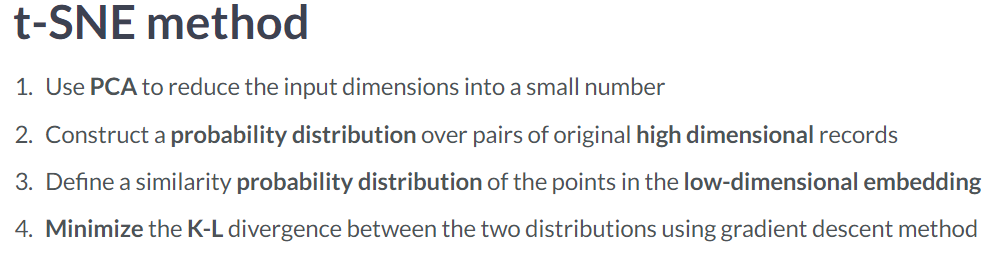

#### Visualization

In [ ]:
distances <- dist(df, method="minkowski", p=2) #p=1 manhattan, p=2 enclidean
heatmap(as.matrix(distances), 
    	Rowv = NA, symm = TRUE)

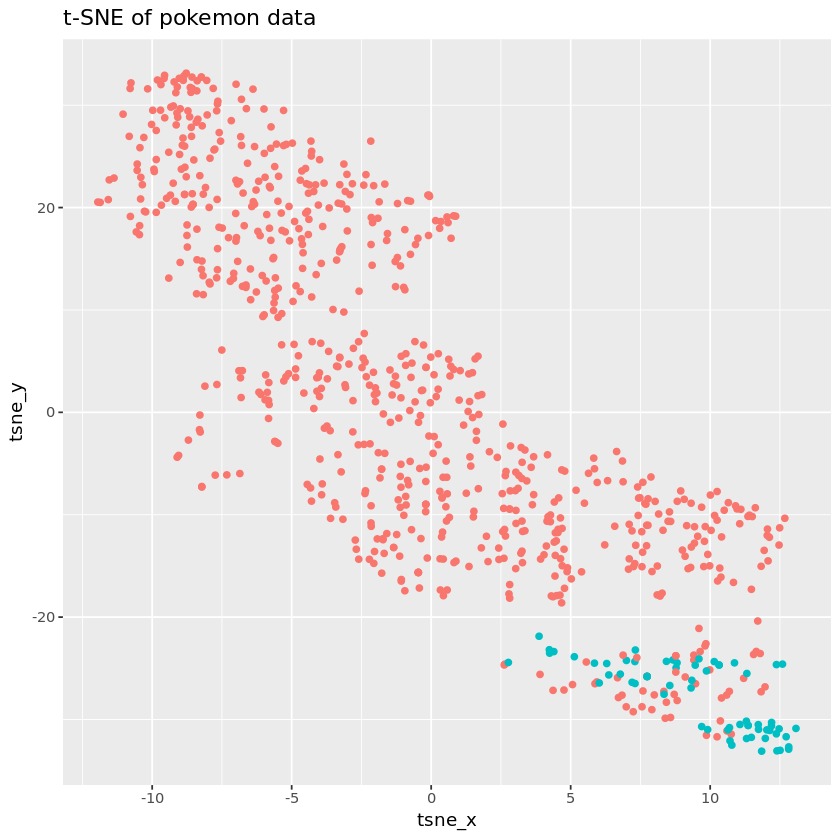

In [3]:
library(Rtsne)
set.seed(42)
tsne = Rtsne(data[,c(3:12)], 
             PCA=TRUE, # to do a pca as first step
             dims=2, #output dimension
             check_duplicates = FALSE,
             max_iter = 1000,
             perplexity = 45
            )

# Store the first two coordinates and plot them 
tsne_plot <- data.frame(tsne_x = tsne$Y[, 1], tsne_y = tsne$Y[, 2], 
                        label = as.factor(data$Legendary))

# Plot the coordinates
ggplot(tsne_plot, aes(x = tsne_x, y = tsne_y, color = label)) + 
	ggtitle("t-SNE of pokemon data") + 
	geom_point()+ 
	theme(legend.position = "none")

In [ ]:
library(data.table)
# Prepare the data.frame
tsne_plot <- data.frame(tsne_x = tsne$Y[1:600,1 ], 
                        tsne_y = tsne$Y[1:600,2 ], 
                        label = as.factor(data[1:600, ]$Legendary))

# Plot the obtained embedding
ggplot(tsne_plot, aes(x = tsne_x, y = tsne_y, color = label)) + 
	ggtitle("MNIST embedding of the first 5K digits") + 
	geom_point() + 
	theme(legend.position="none")

# Get the first 5K records and set the column names
dt_prototypes <- as.data.table(tsne$Y[1:600,])
setnames(dt_prototypes, c("X","Y"))

# Paste the label column as factor
dt_prototypes[, label := as.factor(data[1:600,]$Legendary)]

# Compute the centroids per label
dt_prototypes[, mean_X := mean(X), by = label]
dt_prototypes[, mean_Y := mean(Y), by = label]

# Get the unique records per label
dt_prototypes <- unique(dt_prototypes, by = "label")
dt_prototypes

# Store the last 5000 records in distances and set column names
distances <- as.data.table(tsne$Y[601:800,])
setnames(distances, c("X","Y"))

# Paste the true label
distances[, label := data[601:800,]$Legendary]

# Filter only those labels that are 1 or 0 
distances_filtered <- distances[label == "True" | label == "False"]

# Compute Euclidean distance to prototype of digit 1
distances_filtered[, dist_1 := sqrt( (X - dt_prototypes[label == "True",]$mean_X)^2 + 
                             (Y - dt_prototypes[label == "True",]$mean_Y)^2)]

# Compute the basic statistics of distances from records of class 1
summary(distances_filtered[label == "True"]$dist_1)

# Compute the basic statistics of distances from records of class 0
summary(distances_filtered[label == "False"]$dist_1)

# Plot the histogram of distances of each class
ggplot(distances_filtered, aes(x = dist_1, fill = as.factor(label))) +
  	geom_histogram(binwidth = 5, alpha = .5, position = "identity", show.legend = FALSE) + 
  	ggtitle("Distribution of Euclidean distance 1 vs 0")

In [ ]:
head(tsne$Y)

In [ ]:
plot(tsne$itercosts, type='l') # K-L divergence
plot(tsne$costs, type='l') # last K-L divergence

#### Modeling

In [5]:
print("before undersampling")
table(data$Legendary)
legendary <- data[data$Legendary == "True",]
non_legendary <- data[data$Legendary == "False",]

# Fix the seed
set.seed(1234)

# Create a new negative balanced dataset by undersampling
non_legendary_balanced <- non_legendary[sample(1:nrow(non_legendary), nrow(legendary)),]

# Generate a balanced train set
trainset_balanced <- rbind(legendary, non_legendary_balanced)

print("after undersampling")
table(trainset_balanced$Legendary)

[1] "before undersampling"



False  True 
  735    65 

[1] "after undersampling"



False  True 
   65    65 

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:dplyr’:

    combine

The following object is masked from ‘package:ggplot2’:

    margin



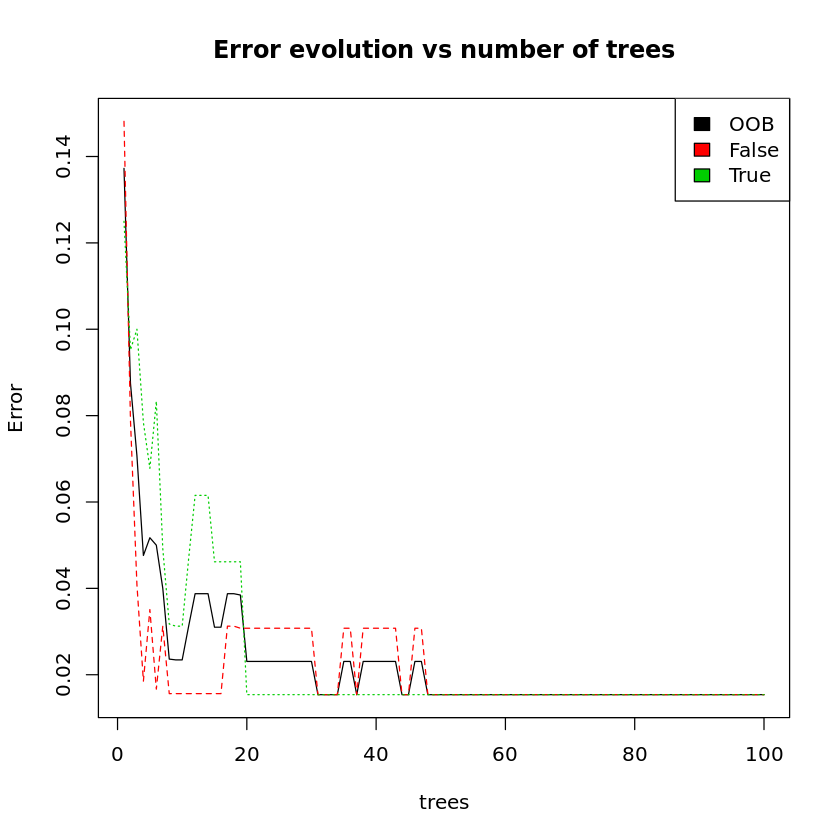

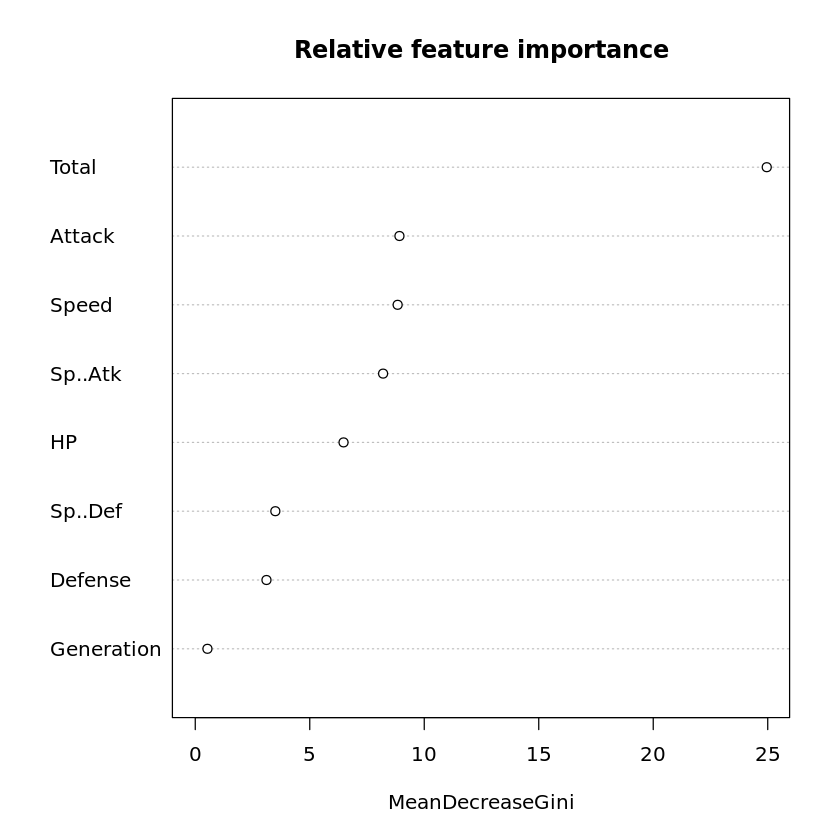

In [6]:
library(randomForest)

X_train <- trainset_balanced[,-c(1:4,13)]
Y_train <- trainset_balanced$Legendary

model1 <- randomForest(x=X_train, y=Y_train,
                      ntree = 100)

plot(model1, main = "Error evolution vs number of trees")
legend("topright", colnames(model1$err.rate), col=1:3, fill=1:3) # OOB is the average

varImpPlot(model1, main="Relative feature importance")

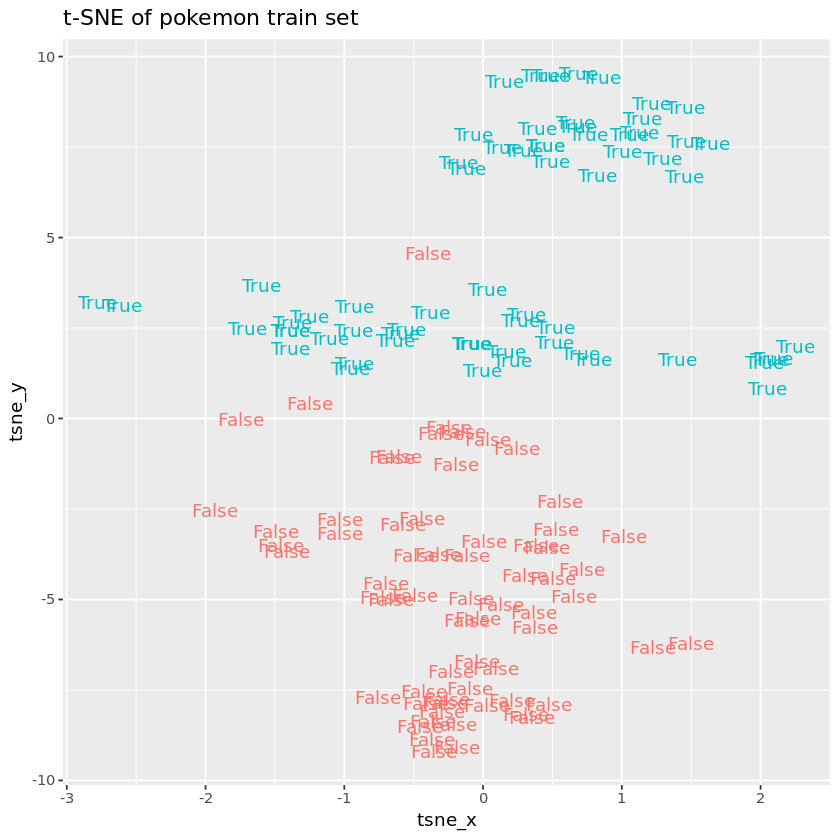

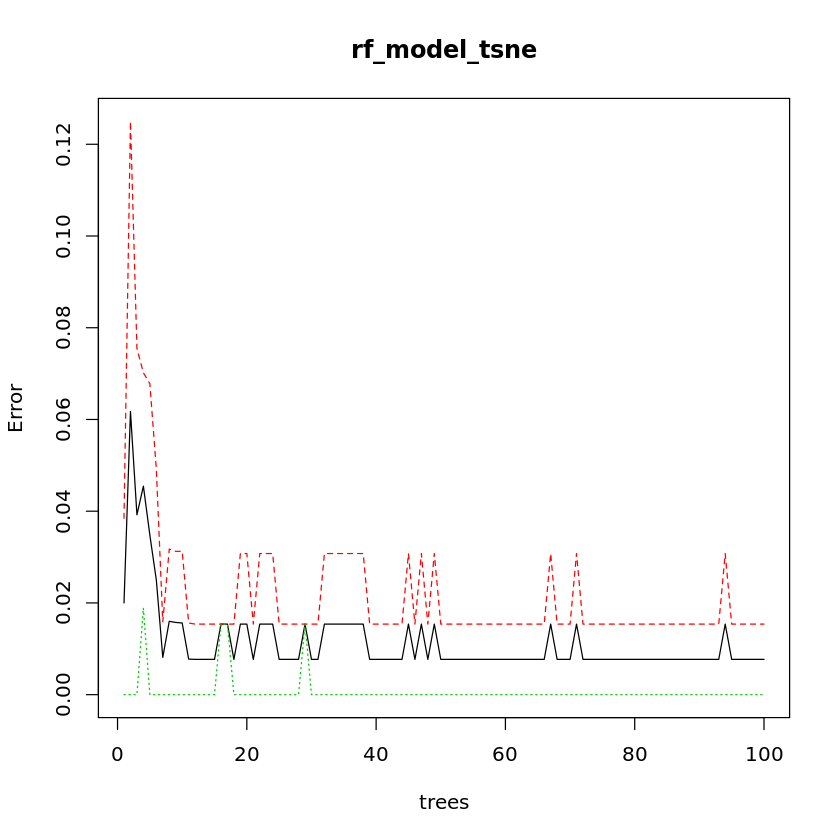

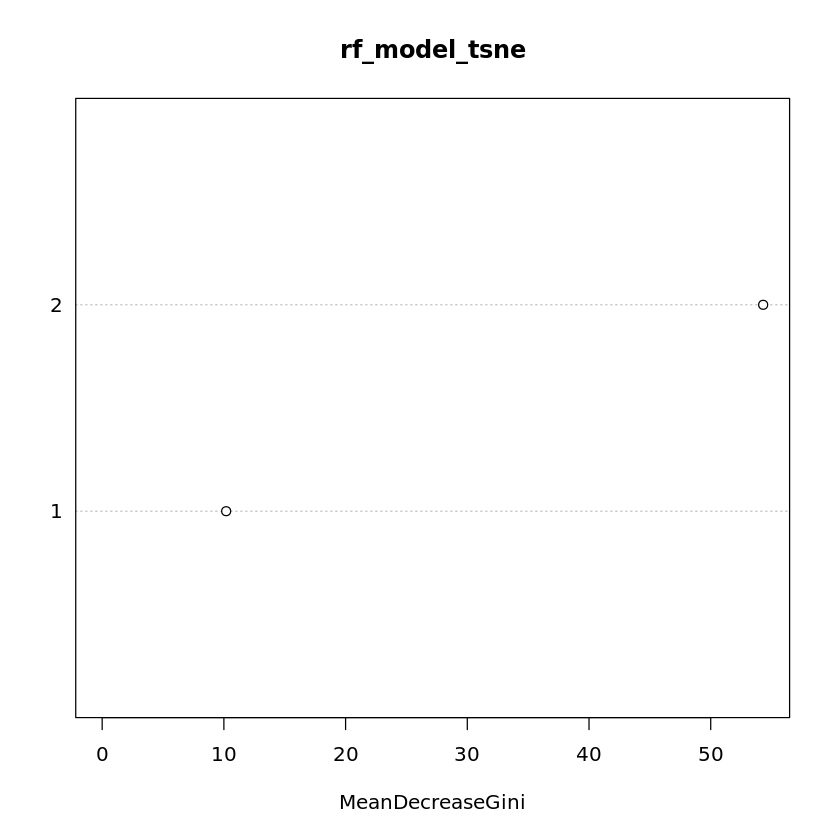

In [7]:
# Set the seed
set.seed(1234)

# Generate the t-SNE embedding 
tsne_output <- Rtsne(as.matrix(X_train), check_duplicates = FALSE, PCA = TRUE)

# Generate a data frame to plot the result
tsne_plot <- data.frame(tsne_x = tsne_output$Y[,1],
                        tsne_y = tsne_output$Y[,2],
                        Legendary = Y_train)

# Plot the embedding usign ggplot and the label
ggplot(tsne_plot, aes(x = tsne_x, y = tsne_y, color = Legendary)) + 
  ggtitle("t-SNE of pokemon train set") + 
  geom_text(aes(label = Legendary)) + theme(legend.position = "none")

# Fix the seed
set.seed(1234)

# Train a random forest
rf_model_tsne <- randomForest(x=tsne_output$Y, y=Y_train, ntree = 100)

# Plot the error evolution
plot(rf_model_tsne)

# Plot the variable importance
varImpPlot(rf_model_tsne)

ERROR: Error in prediction(pred_rf[, 2], data$Legendary): could not find function "prediction"


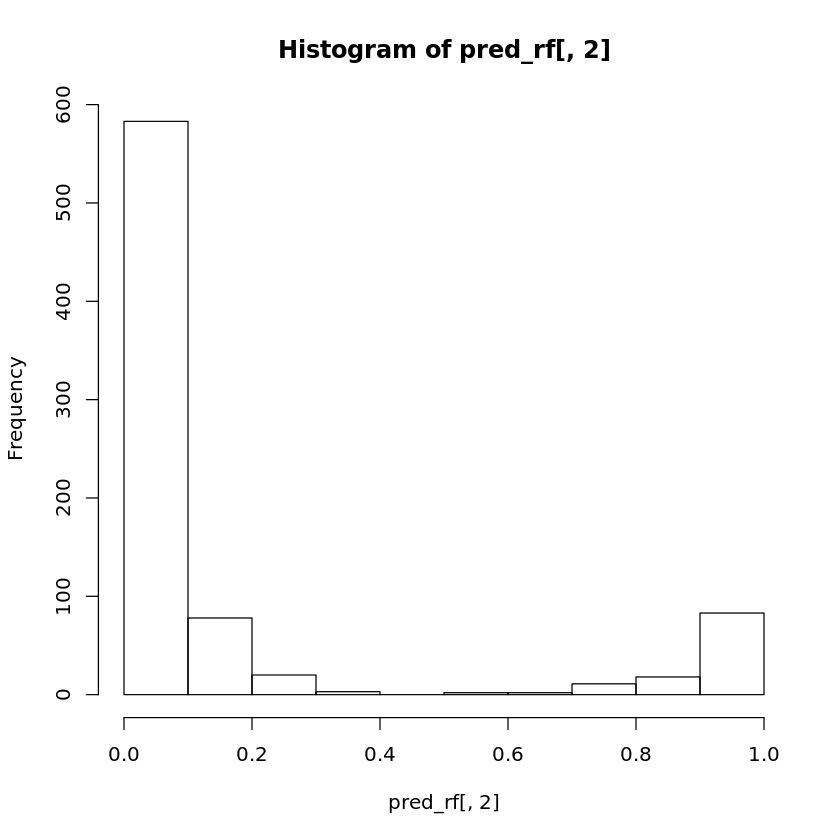

In [19]:
# Predict on the test set using the random forest 
pred_rf <- predict(model1, data[,-c(1:4,13)], type = "prob")

# Plot a probability distibution of the target class
hist(pred_rf[,2])

# Compute the area under the curve
library(ROCR)
pred <- prediction(pred_rf[,2], data$Legendary)
perf <- performance(pred, measure = "auc") 
perf@y.values